# CIFAR 10



## Consignes

On va travailler sur des CNNs avec des images RGB (3 channels sur la couleur) CIFAR-10 est une base d'image de 50000 images d'entrainement en rgb de 32x32 pixels, classées (labélisées) sur 10 classes, and 10,000 images de test.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Analyse de données

In [6]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [8]:
x_train[0].shape

(32, 32, 3)

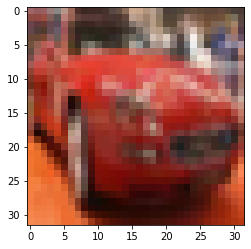

In [9]:
plt.imshow(x_train[5])

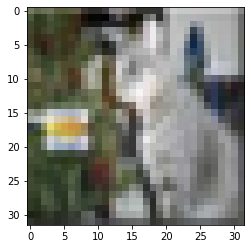

In [10]:
plt.imshow(X_train[78])

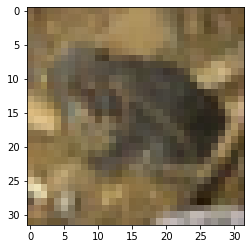

In [11]:
plt.imshow(X_train[23])

# Préparation de l'ANN

In [12]:
y_categ = to_categorical(y_train)
y_categ

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
y_categ.shape

(50000, 10)

In [0]:
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train, 10)

#  Reshape

In [15]:
x_train.shape

(50000, 32, 32, 3)

In [16]:
x_test.shape

(10000, 32, 32, 3)

In [17]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

# EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [25]:
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 2.3024 - accuracy: 0.0986 - val_loss: 2.3029 - val_accuracy: 0.1002
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 2.3022 - accuracy: 0.0996 - val_loss: 2.3027 - val_accuracy: 0.1006
Epoch 3/10
1563/1563 [==============================] - 60s 39ms/step - loss: 2.3019 - accuracy: 0.0995 - val_loss: 2.3034 - val_accuracy: 0.1001
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 2.3013 - accuracy: 0.0999 - val_loss: 2.3032 - val_accuracy: 0.1001
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 2.3031 - accuracy: 0.1011 - val_loss: 2.3024 - val_accuracy: 0.1005
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 2.3009 - accuracy: 0.1001 - val_loss: 2.3061 - val_accuracy: 0.1009
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 2.3012 - accuracy: 0.1005 - val_loss: 2.3059 -

# Evalutation du modèle

In [29]:
model.metrics_names

['loss', 'accuracy']

In [33]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,2.302385,0.09856,2.302898,0.1002
1,2.302235,0.09962,2.302656,0.1006
2,2.301927,0.09950,2.303391,0.1001
3,2.301265,0.09988,2.303189,0.1001
4,2.303070,0.10110,2.302440,0.1005


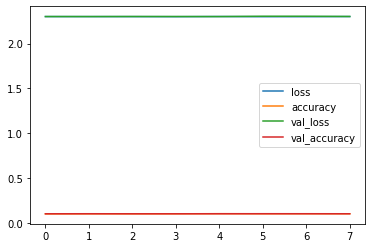

In [34]:
metrics.plot()

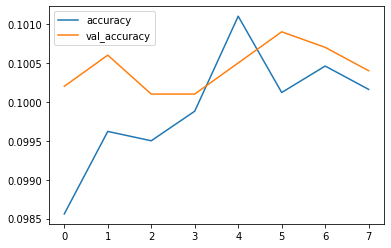

In [35]:
metrics[['accuracy', 'val_accuracy']].plot()

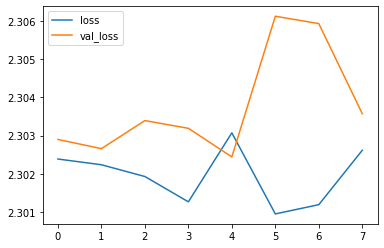

In [36]:
metrics[['loss', 'val_loss']].plot()

In [37]:
print(model.metrics_names)
print(model.evaluate(X_test, y_cat_test, verbose=0))

['loss', 'accuracy']
[2.3035709857940674, 0.10040000081062317]


In [38]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test, predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.10      1.00      0.18      1000
           2       0.50      0.00      0.00      1000
           3       0.67      0.00      0.00      1000
           4       0.67      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.20      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
y_cat_test.shape

(10000, 10)

In [40]:
y_cat_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [41]:
predictions[0]

1

In [42]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.10      1.00      0.18      1000
           2       0.50      0.00      0.00      1000
           3       0.67      0.00      0.00      1000
           4       0.67      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.20      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.21      0.10      0.02     10000
weighted avg       0.21      0.10      0.02     10000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


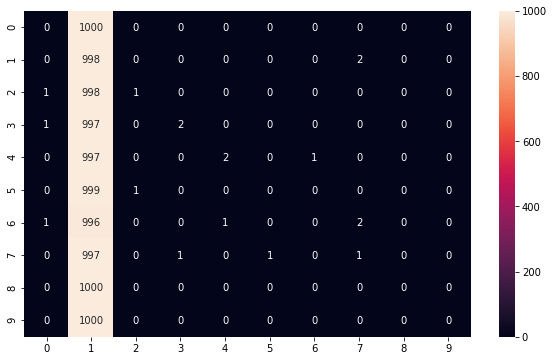

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')

In [0]:
myimage = X_test[0]
myclass = y_test[0]

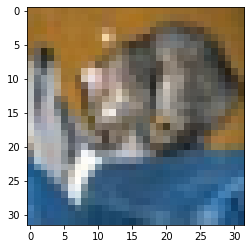

In [50]:
plt.imshow(myimage)

In [51]:
myclass

array([3], dtype=uint8)

In [52]:
model.predict_classes(myimage.reshape(1, 32,32,3))

array([1])

In [53]:
myimage = x_test[16]
myclass = y_test[16]
myclass

array([5], dtype=uint8)

In [54]:
model.predict_classes(myimage.reshape(1, 32,32,3))

array([1])